<a href="https://colab.research.google.com/github/oconcito8/aprendizaje-automatico-entregas-recu/blob/main/PRACTICA1APRENDIZAJE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Práctica 1 Aprendizaje Automático.

###Configuración y Entrenamiento de una Red de Neuronas


---
Carlos Ocón Garay

Grupo: B08


## Enunciado:
Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos
al conjunto de datos Fashion-MNIST, precargado en Keras y muy parecido al que vimos
en clase de reconocimiento de cifras.
Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando
(www.zalando.com), una tienda de moda online alemana especializada en ventas de
ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10
categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución
(28 x 28 píxeles):
Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con
la que la red aprende a clasificar las imágenes
Cuestiones a tener en cuenta.
 Antes de empezar a programar vuestra red neuronal deberéis importar todas las
librerías que vais a requerir.


1. Configurar y entrenar los siguientes modelos de red de neuronas, todos con
función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas,
analizando y reflexionando sobre los resultados:
2. Explicar la salida de la llamada model.summary() de cada uno de los 8 casos
3. Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se
multiplica por 5 las épocas de entrenamiento (25)
4. Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en
el conjunto de datos de prueba
5. Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de
test (test_images[5])
6. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el
modelo para cada uno de los 8 casos

Importamos las librerías que vamos a utilizar para el desarrollo de la practica

In [1]:
#Importación de las librerías a utilizar durante la práctica
import numpy as np
import keras
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

print(tf.__version__)

2.15.0



### Preprocesamiento y Normalización del Conjunto de Datos Fashion MNIST

1. **Importación del Conjunto de Datos**: Se carga el dataset Fashion MNIST desde Keras.
2. **Carga de Datos**: Se dividen los datos en conjuntos de entrenamiento y prueba.
3. **Nombres de Clases**: Se definen los nombres de las categorías correspondientes a las etiquetas en los datos.
4. **Conversión de Tipo de Datos**: Se convierten las imágenes de tipo `uint8` a `float32`.
5. **Normalización de Imágenes**: Se normalizan los valores de los píxeles a un rango de 0 a 1 para mejorar el rendimiento del modelo.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


### Exploración Inicial del Conjunto de Datos Fashion MNIST

1. **Forma de las Imágenes de Entrenamiento**: Se imprime la forma del conjunto de imágenes de entrenamiento, lo que muestra las dimensiones del array que contiene las imágenes de entrenamiento y confirma su tamaño y estructura.

2. **Número de Etiquetas de Entrenamiento**: Se imprime la cantidad de etiquetas de entrenamiento, lo que indica cuántas imágenes de entrenamiento tienen etiquetas asociadas.

3. **Forma de las Imágenes de Prueba**: Se imprime la forma del conjunto de imágenes de prueba, lo que muestra las dimensiones del array que contiene las imágenes de prueba y confirma su tamaño y estructura.

4. **Número de Etiquetas de Prueba**: Se imprime la cantidad de etiquetas de prueba, lo que indica cuántas imágenes de prueba tienen etiquetas asociadas.

In [3]:
print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Número de etiquetas de entrenamiento:", len(train_labels))
print("Forma de las imágenes de prueba:", test_images.shape)
print("Número de etiquetas de prueba:", len(test_labels))

Forma de las imágenes de entrenamiento: (60000, 28, 28)
Número de etiquetas de entrenamiento: 60000
Forma de las imágenes de prueba: (10000, 28, 28)
Número de etiquetas de prueba: 10000


### Visualización de Imágenes de Entrenamiento del Conjunto de Datos Fashion MNIST

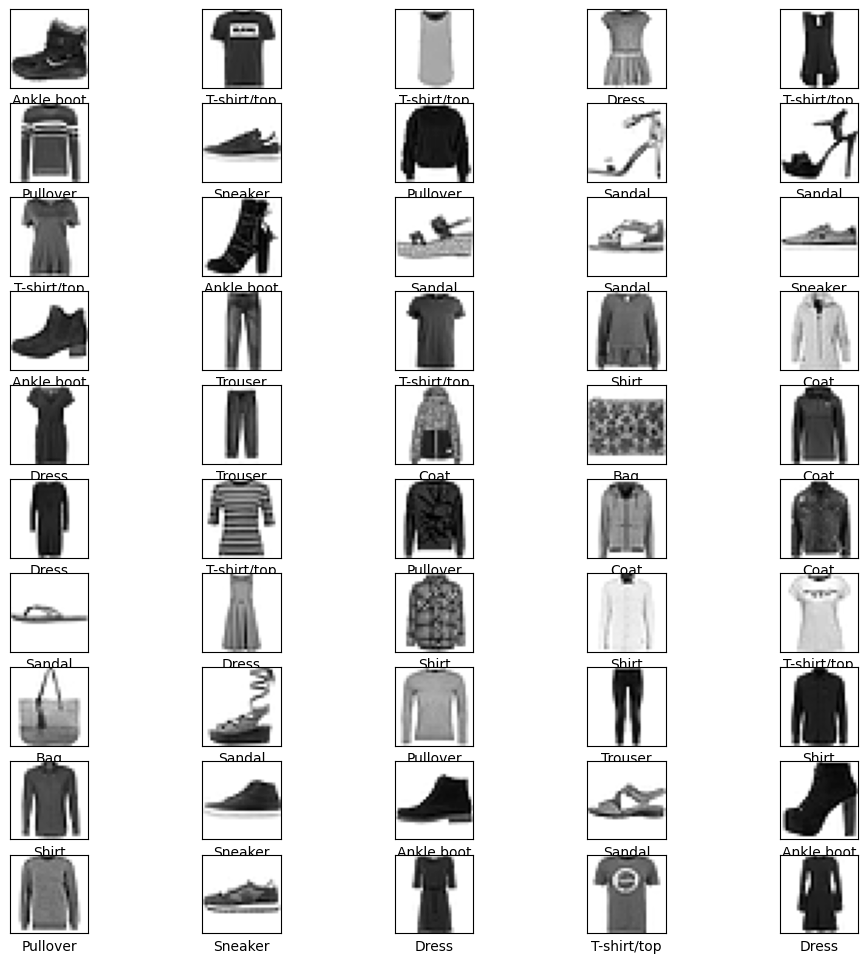

In [5]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

1. **Configuración de la Figura**: Se establece el tamaño de la figura para la visualización de las imágenes.

2. **Generación de Subplots**: Se crea un bucle que genera una cuadrícula de 50 subplots, donde cada subplot muestra una imagen del conjunto de entrenamiento.

3. **Personalización de Subplots**: Se eliminan las marcas y la cuadrícula para cada subplot, y se muestra la imagen correspondiente en escala de grises.

4. **Etiquetado de Imágenes**: Se añade una etiqueta debajo de cada imagen que indica la clase correspondiente según `train_labels`.

5. **Mostrar la Figura**: Se muestra la figura completa con todas las imágenes y sus etiquetas.

# Definición de los modelos

In [6]:
casos = 8
numero_neuronas_primera_capa = [10,10,10,10,512,512,512,512]
funcion_activacion_primera_capa = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optimizador =['sgd','rmsprop','sgd','rmsprop','sgd','rmsprop','sgd','rmsprop']
funcion_perdida = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
numero_iteraciones = [5,5,5,5,5,5,5,5]
metrica = ['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
models = []

En este modelo de red neuronal se han definido 8 configuraciones diferentes para su evaluación. Cada configuración varía en el número de neuronas en la primera capa, la función de activación, y el optimizador utilizado. Específicamente, los primeros cuatro casos tienen 10 neuronas en la primera capa, mientras que los últimos cuatro tienen 512 neuronas. Las funciones de activación 'relu' y 'sigmoid' se alternan entre los casos, al igual que los optimizadores 'sgd' y 'rmsprop'. La función de pérdida utilizada en todos los casos es 'sparse_categorical_crossentropy', y cada configuración se entrenará durante 5 iteraciones, evaluando su rendimiento mediante la métrica de 'accuracy'. Los modelos configurados se almacenarán en una lista para su posterior análisis.

# Construcción y Evaluación de Modelos de Red Neuronal

In [7]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

casos = 8
numero_neuronas_primera_capa = [10, 10, 10, 10, 512, 512, 512, 512]
funcion_activacion_primera_capa = ['relu', 'relu', 'sigmoid', 'sigmoid', 'relu', 'relu', 'sigmoid', 'sigmoid']
optimizador = ['sgd', 'rmsprop', 'sgd', 'rmsprop', 'sgd', 'rmsprop', 'sgd', 'rmsprop']
funcion_perdida = ['sparse_categorical_crossentropy'] * 8

models = []
for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=['accuracy'])
  models.append(model)

# Evaluación de los modelos
test_loss = []
test_acc = []
for model in models:
  loss, acc = model.evaluate(test_images, test_labels)
  test_loss.append(loss)
  test_acc.append(acc)

print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_acc)


313/313 [==============================] - 2s 5ms/step - loss: 2.5137 - accuracy: 0.1341
Pérdida en el conjunto de prueba: [2.3400650024414062, 2.3687286376953125, 2.4174435138702393, 2.509418487548828, 2.4412238597869873, 2.3576338291168213, 2.57598614692688, 2.5136971473693848]
Precisión en el conjunto de prueba: [0.11339999735355377, 0.12020000070333481, 0.014700000174343586, 0.09809999912977219, 0.06700000166893005, 0.04170000180602074, 0.03620000183582306, 0.13410000503063202]


Se construyen y evalúan ocho modelos de red neuronal utilizando diferentes configuraciones para explorar su rendimiento.

Se define el número de casos como 8, con variaciones en el número de neuronas en la primera capa, la función de activación, y el optimizador utilizado. Cada modelo sigue una arquitectura simple con una capa de aplanamiento (Flatten), una capa densa con el número de neuronas especificado y la función de activación correspondiente, y una capa de salida con 10 neuronas y activación
'softmax'. Los modelos se compilan con el optimizador y la función de pérdida especificados, y se almacenan en una lista para su posterior evaluación.

Para evaluar los modelos, se itera sobre cada uno, evaluando su rendimiento en el conjunto de datos de prueba. Se almacenan la pérdida y la precisión de cada modelo, y finalmente se imprimen estos valores.

In [8]:
for caso in range(casos):
  print("Caso= ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

Caso=  1
---------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Caso=  2
---------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)   

# Entrenamiento y Evaluación de Modelos de Red Neuronal

 Se recompila cada modelo con los parámetros específicos definidos anteriormente (optimizador, función de pérdida y métrica). Luego, se imprimen los detalles de cada caso, incluyendo el número de neuronas en la primera capa, la función de activación, el optimizador y la métrica. Posteriormente, cada modelo se entrena utilizando el conjunto de datos de entrenamiento durante el número de épocas especificadas para cada caso. Esto permite evaluar y comparar el rendimiento de los modelos con diferentes configuraciones.

In [9]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("Neuronas en la primera capa",numero_neuronas_primera_capa[caso])
  print("Función activación 1 capa:: ",funcion_activacion_primera_capa[caso])
  print("Función activación ultima capa: softmax")
  print("Optimizador: ",optimizador[caso])
  print("Función de perdida: ",funcion_perdida[caso])
  print("Métrica: ",metrica[caso])
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
  print("\n\n")

CASO  1
---------------------------------
Neuronas en la primera capa 10
Función activación 1 capa::  relu
Función activación ultima capa: softmax
Optimizador:  sgd
Función de perdida:  sparse_categorical_crossentropy
Métrica:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1215 - accuracy: 0.6269
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6547 - accuracy: 0.7747
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5694 - accuracy: 0.8046
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5305 - accuracy: 0.8165
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5078 - accuracy: 0.8250



CASO  2
---------------------------------
Neuronas en la primera capa 10
Función activación 1 capa::  relu
Función activación ultima capa: softmax
Optimizador:  rmsprop
Función de perdida:  sparse_categorical_crossentropy

# Evaluación de los modelos:




In [13]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])



313/313 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8759


In [14]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.49811068177223206
PRECISIÓN CON LOS DATOS DE TEST:  0.8253999948501587



CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4624379277229309
PRECISIÓN CON LOS DATOS DE TEST:  0.8396000266075134



CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.7395465970039368
PRECISIÓN CON LOS DATOS DE TEST:  0.7631000280380249



CASO  4
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.47510337829589844
PRECISIÓN CON LOS DATOS DE TEST:  0.8324999809265137



CASO  5
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4330260753631592
PRECISIÓN CON LOS DATOS DE TEST:  0.8500999808311462



CASO  6
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.36852994561195374
PRECISIÓN CON LOS DATOS DE TEST:  0.8762000203132629



CASO  7
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5555899143218994
PRECISIÓN 

# Con el modelo entrenado, ya podemos usarlo para hacer predicciones sobre las fotos entrenadas.





In [15]:
predictions = []
for caso in range(casos):
  predictions.append(models[caso].predict(test_images))

313/313 [==============================] - 1s 3ms/step


In [16]:
for caso in range(casos):
  print("----------------------------------------------------------")
  print("PREDICCIONES CASO ", caso + 1 , " : ", predictions[caso][5])
  print("VALOR MÁXIMO: ", np.argmax(predictions[caso][5]))
  print("\n\n")

----------------------------------------------------------
PREDICCIONES CASO  1  :  [3.9230827e-03 9.9136364e-01 7.5766147e-04 1.2957599e-03 2.5306039e-03
 2.3486704e-09 6.0792787e-05 4.8677011e-05 1.9646686e-05 3.8415330e-08]
VALOR MÁXIMO:  1



----------------------------------------------------------
PREDICCIONES CASO  2  :  [7.8569137e-04 9.9835837e-01 1.3559827e-04 1.8383504e-04 5.2197755e-04
 9.5053211e-14 1.4269291e-05 3.1837002e-11 1.4385883e-07 7.8317458e-10]
VALOR MÁXIMO:  1



----------------------------------------------------------
PREDICCIONES CASO  3  :  [4.4893540e-02 8.7140226e-01 7.4156965e-03 3.3023171e-02 1.4245703e-02
 3.2724582e-03 1.9456735e-02 3.7180199e-03 2.6385987e-04 2.3085147e-03]
VALOR MÁXIMO:  1



----------------------------------------------------------
PREDICCIONES CASO  4  :  [5.4793066e-04 9.8903030e-01 2.2027309e-03 3.9131641e-03 3.3515531e-03
 1.7322415e-06 9.3765184e-04 2.3890850e-06 1.1340027e-05 1.1129184e-06]
VALOR MÁXIMO:  1



------------

In [18]:
test_labels[5]

1

# Visualización de Predicciones para un llos 8 casos

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURA  5


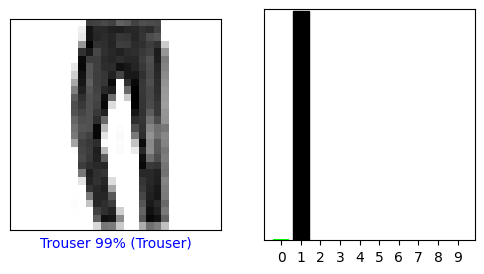




----------------------------------------------------------
PREDICCIONES CASO  2  FIGURA  5


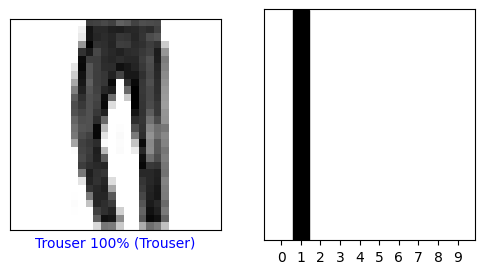




----------------------------------------------------------
PREDICCIONES CASO  3  FIGURA  5


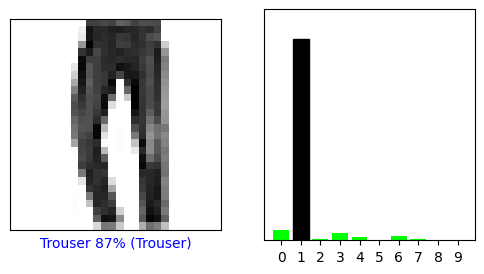




----------------------------------------------------------
PREDICCIONES CASO  4  FIGURA  5


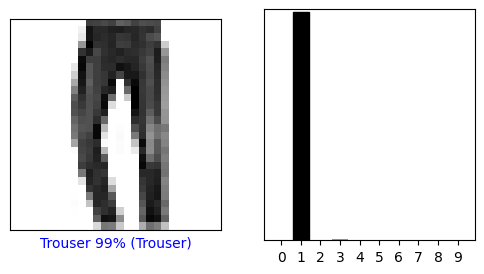




----------------------------------------------------------
PREDICCIONES CASO  5  FIGURA  5


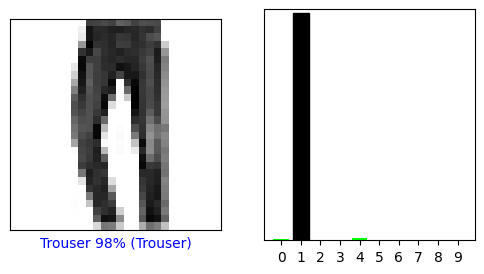




----------------------------------------------------------
PREDICCIONES CASO  6  FIGURA  5


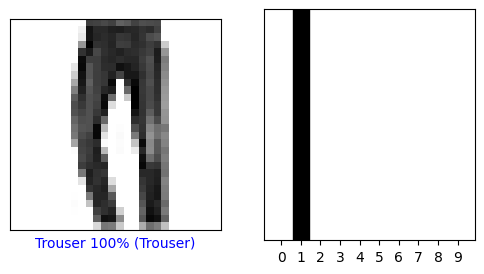




----------------------------------------------------------
PREDICCIONES CASO  7  FIGURA  5


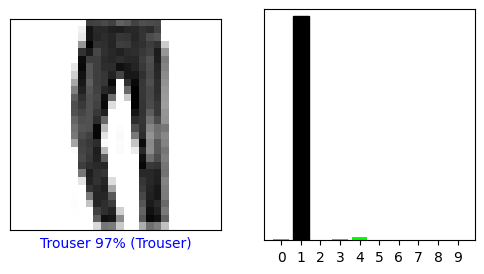




----------------------------------------------------------
PREDICCIONES CASO  8  FIGURA  5


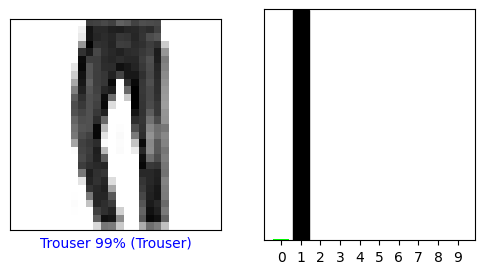

In [21]:
def prediccion_un_caso(caso_concreto):
  for caso in range(casos):
    print("----------------------------------------------------------")
    print("PREDICCIONES CASO ", caso + 1 , " FIGURA ", caso_concreto)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(caso_concreto, predictions[caso][caso_concreto], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(caso_concreto, predictions[caso][caso_concreto],  test_labels)
    plt.show()
    print("\n\n")

prediccion_un_caso(5)

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURA  6


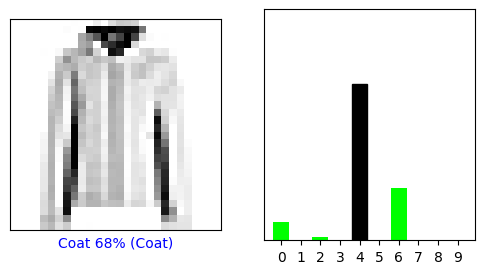




----------------------------------------------------------
PREDICCIONES CASO  2  FIGURA  6


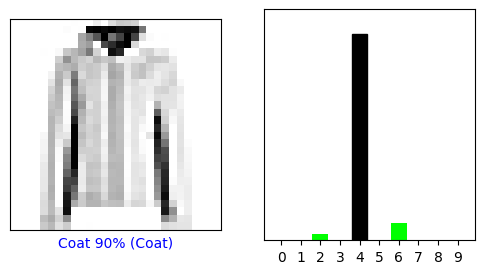




----------------------------------------------------------
PREDICCIONES CASO  3  FIGURA  6


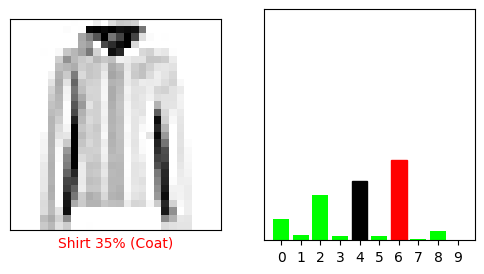




----------------------------------------------------------
PREDICCIONES CASO  4  FIGURA  6


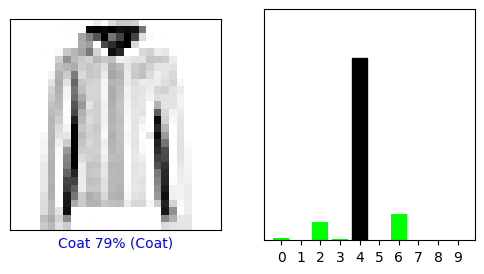




----------------------------------------------------------
PREDICCIONES CASO  5  FIGURA  6


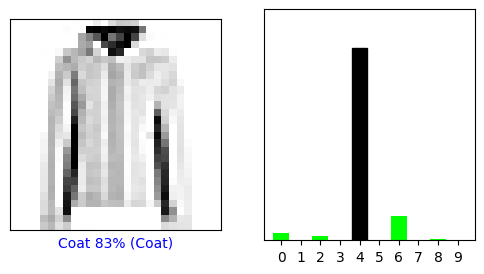




----------------------------------------------------------
PREDICCIONES CASO  6  FIGURA  6


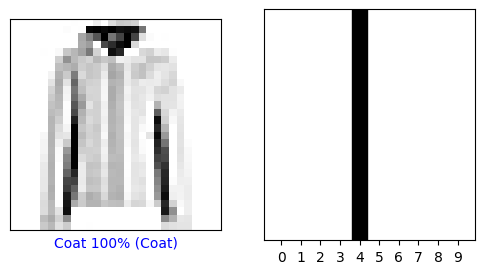




----------------------------------------------------------
PREDICCIONES CASO  7  FIGURA  6


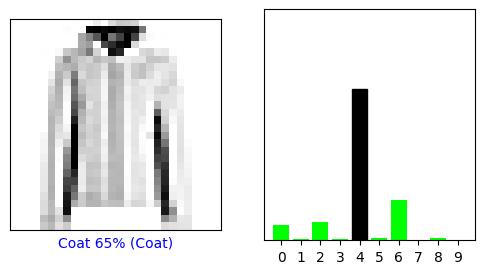




----------------------------------------------------------
PREDICCIONES CASO  8  FIGURA  6


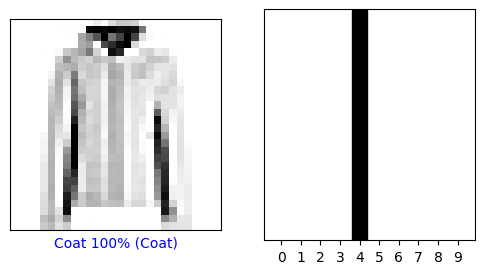

In [24]:
prediccion_un_caso(caso_concreto=6)


Se visualiza las predicciones de varios modelos de red neuronal configurados de manera diferente. Para cada modelo, se genera una figura que muestra:
1. Imágenes de prueba con sus etiquetas predichas.
2. Gráficos de barras con las probabilidades de predicción para cada clase.

Esto permite comparar visualmente cómo cada modelo clasifica las mismas imágenes y evaluar su rendimiento. Los resultados muestran la precisión de las predicciones, destacando la capacidad de cada configuración del modelo para clasificar correctamente las imágenes de prueba.

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURAS  7  x  2


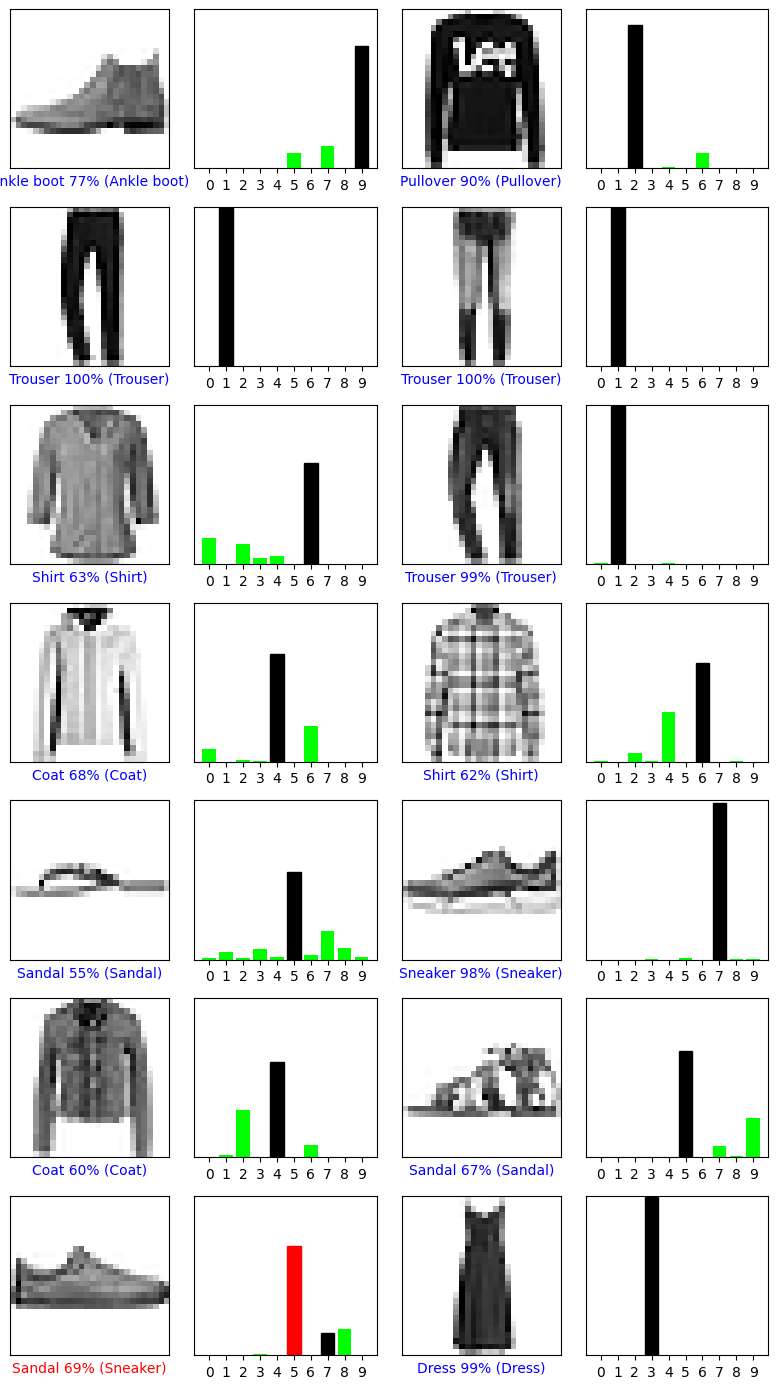




----------------------------------------------------------
PREDICCIONES CASO  2  FIGURAS  7  x  2


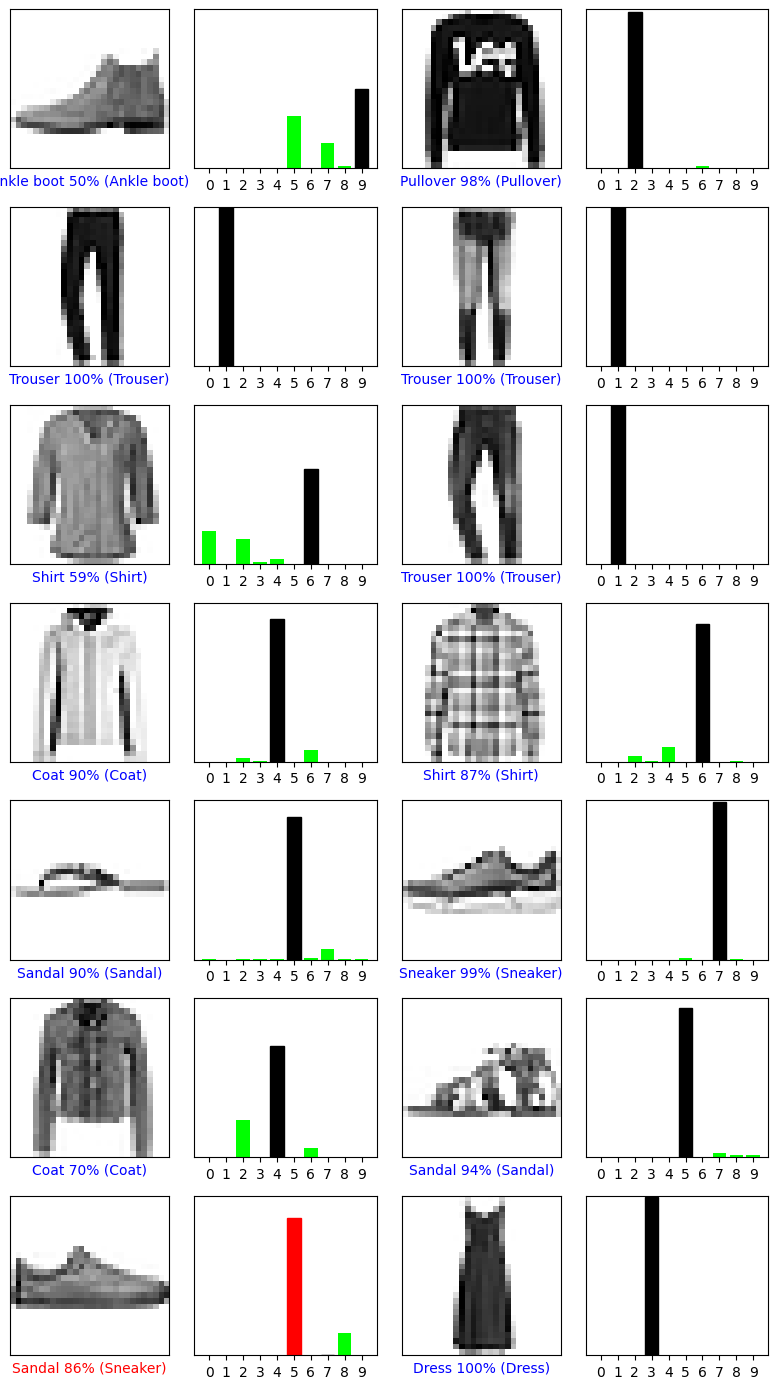




----------------------------------------------------------
PREDICCIONES CASO  3  FIGURAS  7  x  2


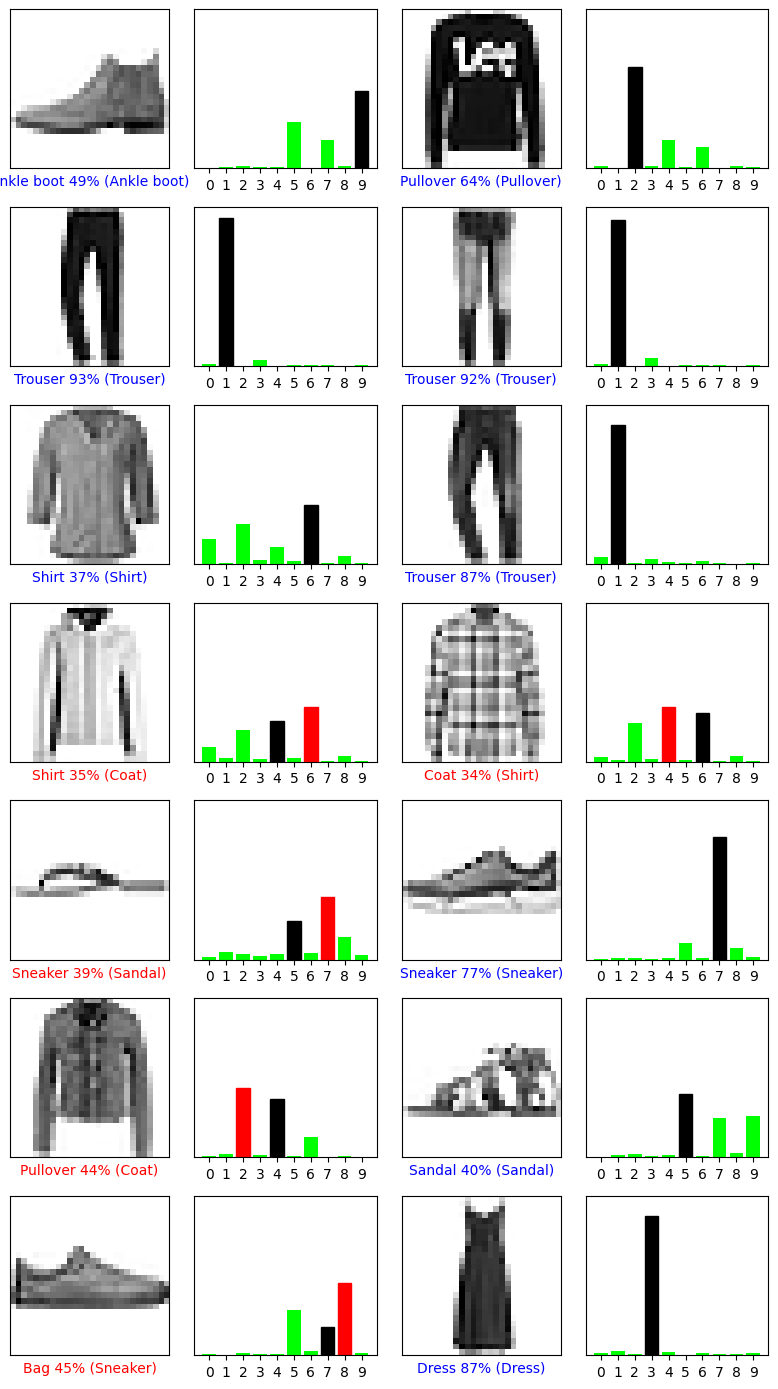




----------------------------------------------------------
PREDICCIONES CASO  4  FIGURAS  7  x  2


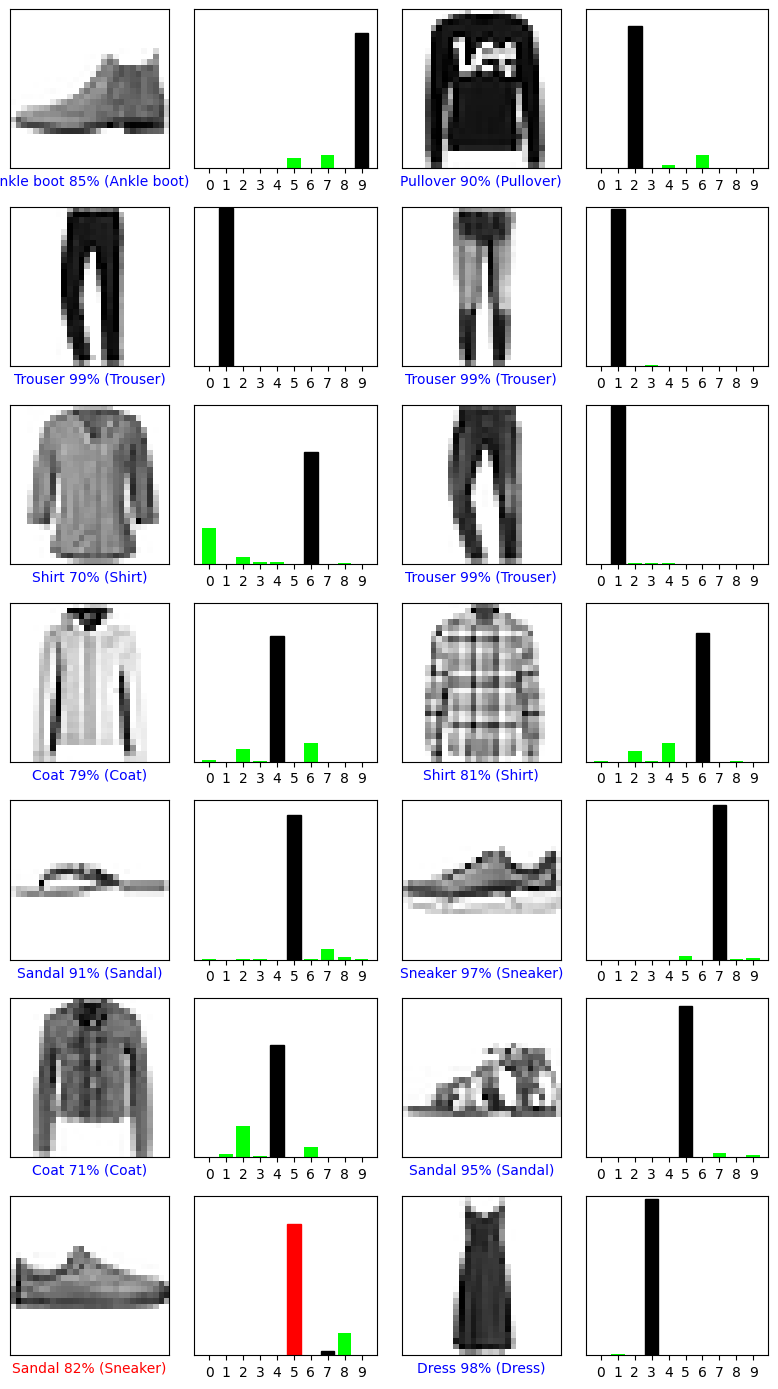




----------------------------------------------------------
PREDICCIONES CASO  5  FIGURAS  7  x  2


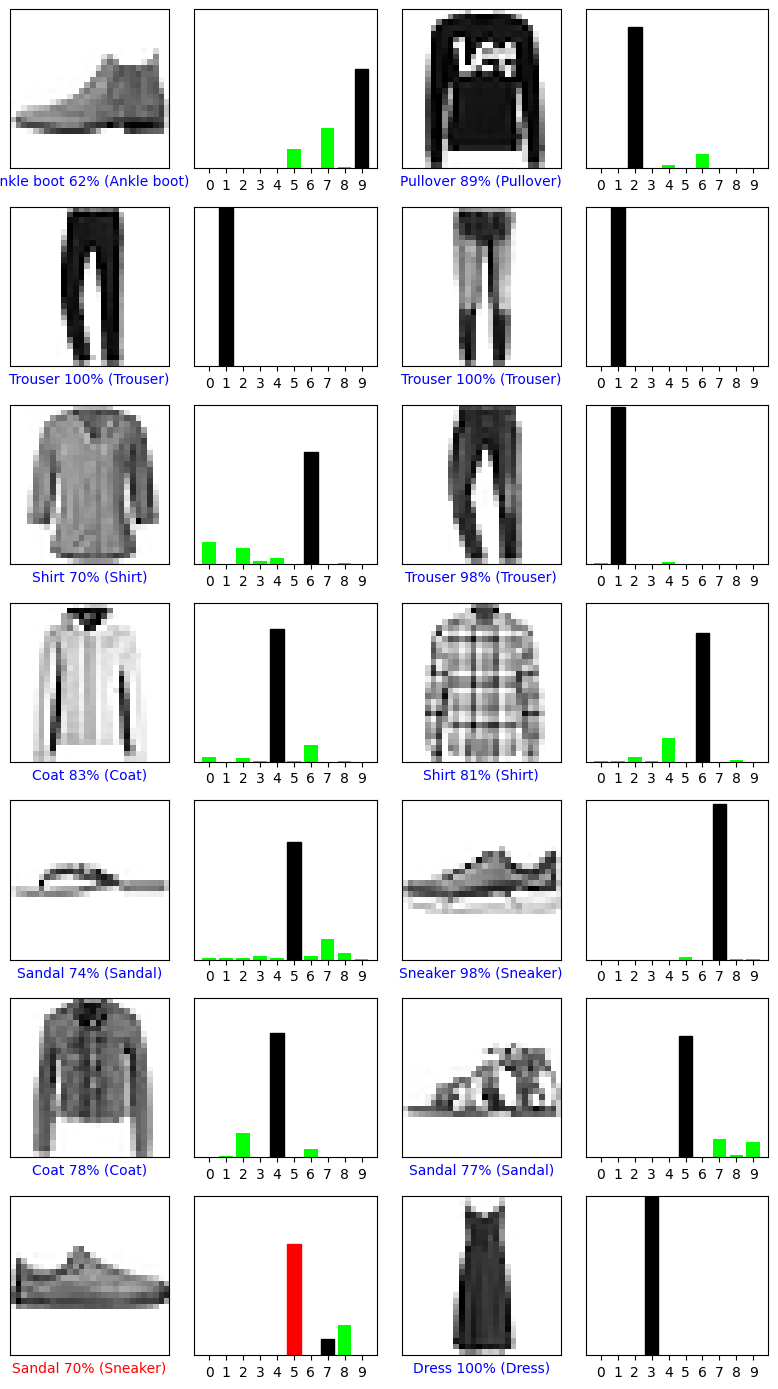




----------------------------------------------------------
PREDICCIONES CASO  6  FIGURAS  7  x  2


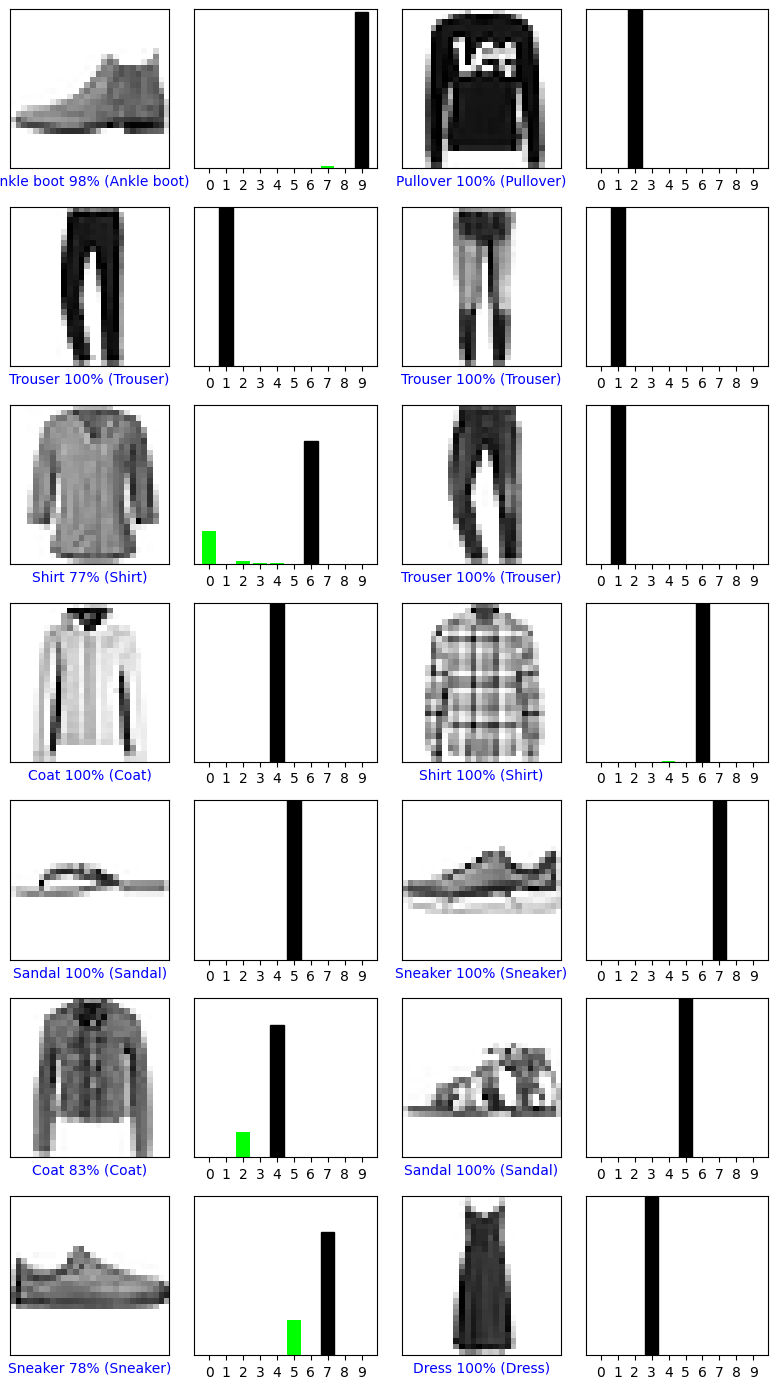




----------------------------------------------------------
PREDICCIONES CASO  7  FIGURAS  7  x  2


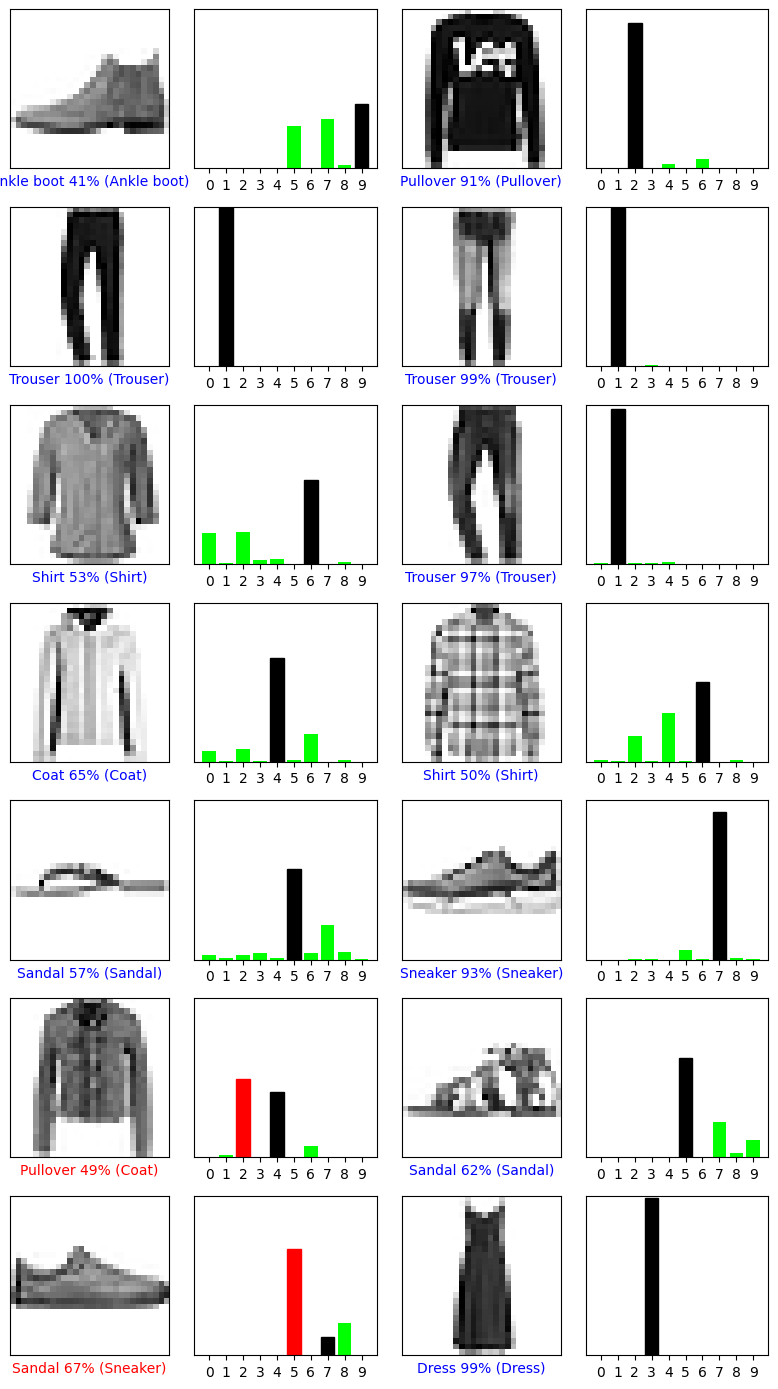




----------------------------------------------------------
PREDICCIONES CASO  8  FIGURAS  7  x  2


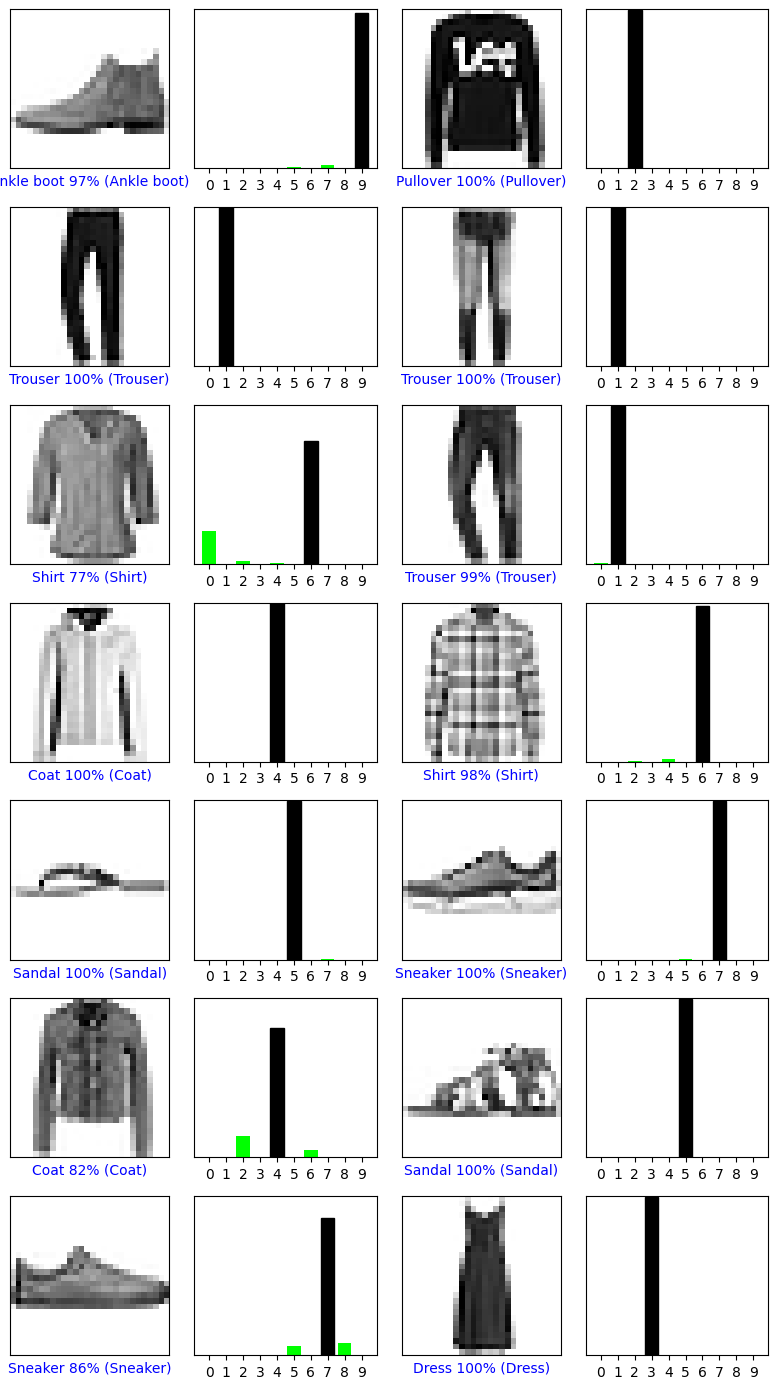

In [25]:
def pintar_conjunto_casos_con_predicciones(num_rows, num_cols, casos):
  num_images = num_rows*num_cols
  for caso in range(casos):
    print("----------------------------------------------------------")
    print("PREDICCIONES CASO ", caso + 1 , " FIGURAS ", num_rows, " x ", num_cols)
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[caso][i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[caso][i], test_labels)
    plt.tight_layout()
    plt.show()
    print("\n\n")

pintar_conjunto_casos_con_predicciones(7,2,8)


### Resultados Obtenidos

El código proporciona una comparación visual de las predicciones realizadas por ocho modelos de red neuronal, cada uno con diferentes configuraciones de la primera capa y optimizadores. Los resultados muestran:

1. **Precisión de las Predicciones**: La mayoría de las imágenes fueron clasificadas correctamente. Por ejemplo, "Ankle boot" se predijo con un 77% de precisión y "Pullover" con un 90%.

2. **Visualización de Confianza**: Los gráficos de barras junto a cada imagen muestran las probabilidades de predicción, permitiendo ver la confianza del modelo en cada clase.

3. **Comparación de Modelos**: La visualización facilita la evaluación del rendimiento relativo de cada configuración, observando qué tan bien cada modelo predice las mismas imágenes de prueba. Esto ayuda a identificar qué configuraciones son más efectivas para el conjunto de datos dado.

Mejoras:

In [26]:
# CASO DE USO CON OPTIMIZADOR ADAM
for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)

for caso in range(casos):
  models[caso].compile(optimizer='Adam', loss=funcion_perdida[caso], metrics=[metrica[caso]])

for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: Adam")
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
  print("\n\n")

test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR: Adam
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4637 - accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4384 - accuracy: 0.8481
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4244 - accuracy: 0.8536
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4147 - accuracy: 0.8541
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4072 - accuracy: 0.8569



CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR: Adam
FUNCIÓN PÉRDIDA:  sparse_categorical_crosse

In [27]:
for caso in range(casos):
  if caso==1 or caso ==6:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
    model.add(Dense(10, activation='softmax'))
    models.append(model)

for caso in range(casos):
  if caso==1 or caso ==6:
    models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

for caso in range(casos):
  if caso==1 or caso ==6:
    print("CASO ",caso + 1)
    print("---------------------------------")
    print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
    print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
    print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
    print("OPTIMIZADOR: ", optimizador[caso])
    print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
    print("MÉTRICA: ",metrica[caso])
    print("---------------------------------")
    models[caso].fit(train_images, train_labels, epochs=25)
    print("\n\n")

test_loss = []
test_acc = []
for caso in range(casos):
  if caso==1 or caso ==6:
    test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
    test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

for caso in range(2):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/25
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3841 - accuracy: 0.8645
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3806 - accuracy: 0.8661
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8665
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3765 - accuracy: 0.8685
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8693
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3727 - accuracy: 0.8696
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8710
Epoch 

In [29]:
!pip install matplotlib-venn

In [31]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [32]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [35]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=25)

test_loss, test_acc = model.evaluate(test_images,  test_labels)

print("CASO 8")
print("---------------------------------")
print("PERDIDA CON LOS DATOS DE TEST: ",test_loss)
print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc)

Epoch 1/25
1875/1875 [==============================] - 35s 10ms/step - loss: 0.5034 - accuracy: 0.8204
Epoch 2/25
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3836 - accuracy: 0.8602
Epoch 3/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3453 - accuracy: 0.8734
Epoch 4/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3167 - accuracy: 0.8832
Epoch 5/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2937 - accuracy: 0.8913
Epoch 6/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2767 - accuracy: 0.8960
Epoch 7/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2614 - accuracy: 0.9023
Epoch 8/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2481 - accuracy: 0.9074
Epoch 9/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2336 - accuracy: 0.9128
Epoch 10/25
1875/1875 [==============================] - 15s 8ms/step - 

opncional


In [40]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [41]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [42]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [43]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [44]:
casos = 8
numero_neuronas_primera_capa = [10,10,10,10,512,512,512,512]
funcion_activacion_primera_capa = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optimizador =['sgd','rmsprop','sgd','rmsprop','sgd','rmsprop','sgd','rmsprop']
funcion_perdida = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
numero_iteraciones = [5,5,5,5,5,5,5,5]
metrica = ['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
models = []
historys = []

In [45]:
for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)

In [46]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

In [47]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [48]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  historys.append(models[caso].fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data = (x_val, y_val)))
  print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/20
98/98 [==============================] - 1s 7ms/step - loss: 1.9899 - accuracy: 0.3376 - val_loss: 1.7058 - val_accuracy: 0.4905
Epoch 2/20
98/98 [==============================] - 1s 5ms/step - loss: 1.4817 - accuracy: 0.5917 - val_loss: 1.2911 - val_accuracy: 0.6400
Epoch 3/20
98/98 [==============================] - 0s 5ms/step - loss: 1.1778 - accuracy: 0.6517 - val_loss: 1.0881 - val_accuracy: 0.6622
Epoch 4/20
98/98 [==============================] - 1s 5ms/step - loss: 1.0288 - accuracy: 0.6674 - val_loss: 0.9805 - val_accuracy: 0.6758
Epoch 5/20
98/98 [==============================] - 0s 5ms/step - loss: 0.9436 - accuracy: 0.6785 - val_loss: 0.9155 - val_accuracy: 0.6851
Epoch 6/20
98/98 [======

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[1.989945650100708, 1.481695294380188, 1.177795171737671, 1.0287672281265259, 0.943566083908081, 0.8879446387290955, 0.8475785851478577, 0.8160179853439331, 0.7902419567108154, 0.7682852149009705, 0.7491317987442017, 0.732058048248291, 0.7162479162216187, 0.7016379833221436, 0.6878518462181091, 0.6749369502067566, 0.6628829836845398, 0.6515970826148987, 0.6410256028175354, 0.6312327980995178]
[0.3375999927520752, 0.5916600227355957, 0.6516600251197815, 0.6673600077629089, 0.6785200238227844, 0.6876199841499329, 0.6989200115203857, 0.710919976234436, 0.7203800082206726, 0.7301599979400635, 0.7387400269508362, 0.7472599744796753, 0.7553200125694275, 0.7625799775123596, 0.7687399983406067, 0.7751799821853638, 0.780160

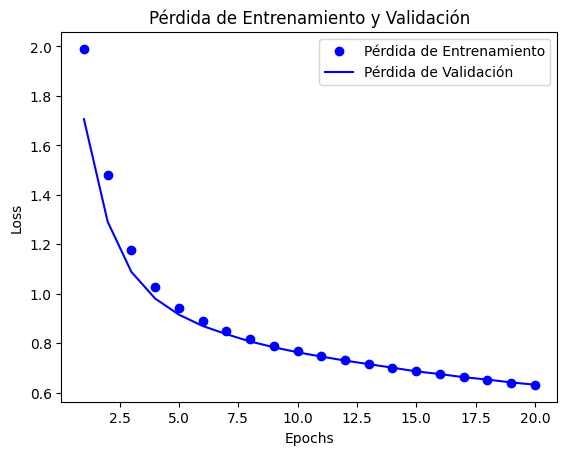

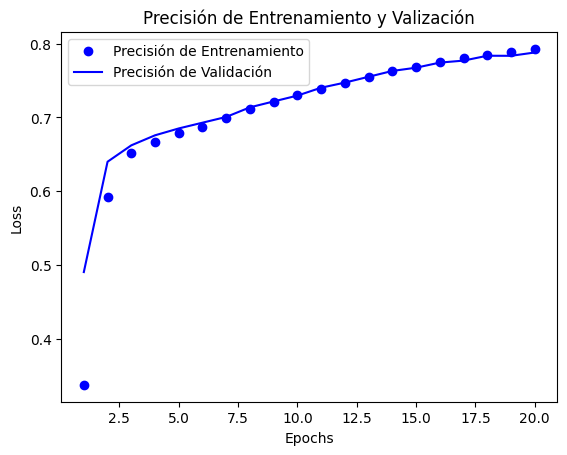

CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[1.4826104640960693, 0.8752195239067078, 0.6491990685462952, 0.575962245464325, 0.5385658740997314, 0.5136784911155701, 0.49618515372276306, 0.4825102984905243, 0.4726286232471466, 0.46286293864250183, 0.4546709358692169, 0.4480697214603424, 0.441980242729187, 0.43689051270484924, 0.4329344928264618, 0.42757949233055115, 0.4242529273033142, 0.421796977519989, 0.417329341173172, 0.414556086063385]
[0.46832001209259033, 0.730180025100708, 0.784060001373291, 0.8047599792480469, 0.815339982509613, 0.8237599730491638, 0.830079972743988, 0.8323400020599365, 0.8357999920845032, 0.8398799896240234, 0.8423399925231934, 0.8454999923706055, 0.8468999862670898, 0.8483800292015076, 0.8486400246620178, 0.8512399792671204, 0.

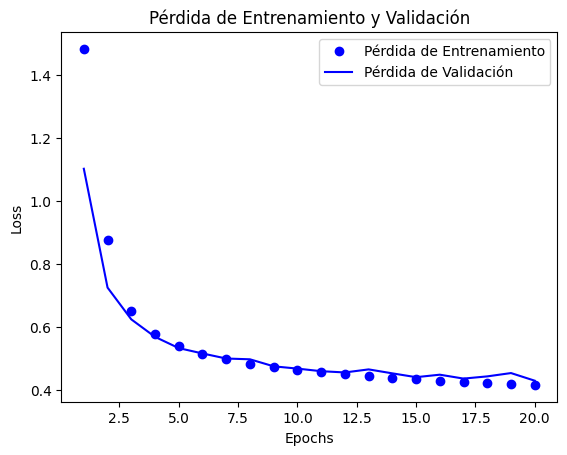

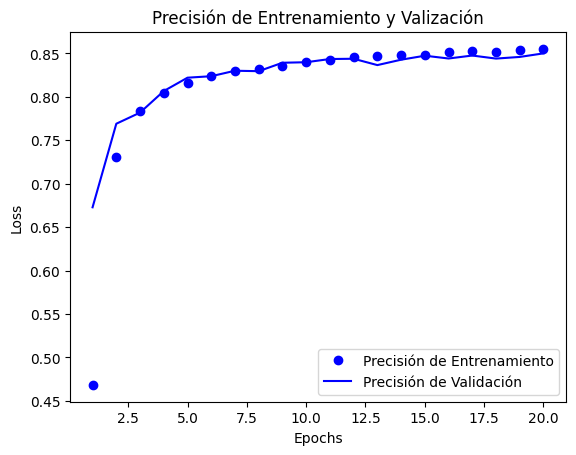

CASO  3
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[2.3262062072753906, 2.203871011734009, 2.129495859146118, 2.0640132427215576, 2.004122734069824, 1.9475979804992676, 1.8932983875274658, 1.8407799005508423, 1.7901462316513062, 1.741684079170227, 1.6955461502075195, 1.6517683267593384, 1.610363483428955, 1.5712382793426514, 1.5343183279037476, 1.4995073080062866, 1.466686725616455, 1.4357454776763916, 1.406559944152832, 1.3790292739868164]
[0.1459999978542328, 0.25457999110221863, 0.3594599962234497, 0.44835999608039856, 0.5073400139808655, 0.5426999926567078, 0.5787400007247925, 0.6030399799346924, 0.6177999973297119, 0.6263800263404846, 0.6361200213432312, 0.6441199779510498, 0.6511800289154053, 0.6552000045776367, 0.6575400233268738, 0.6583999991416931, 0.65

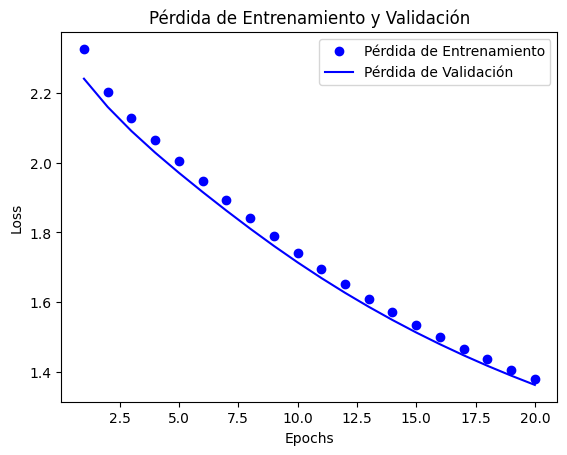

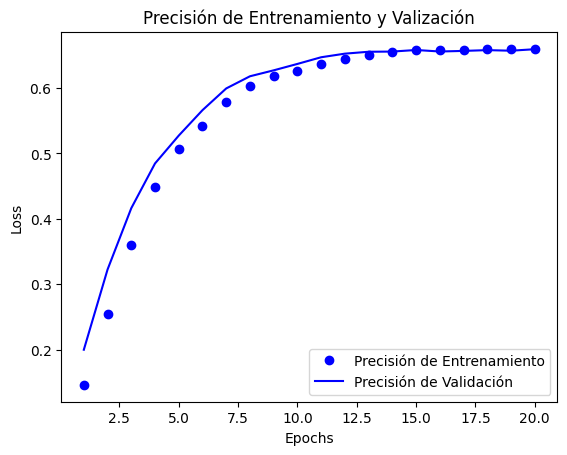

CASO  4
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[1.9055873155593872, 1.524020791053772, 1.3067930936813354, 1.1410350799560547, 1.011154294013977, 0.9063760042190552, 0.8204894661903381, 0.750281035900116, 0.6912856101989746, 0.6430291533470154, 0.6046240329742432, 0.5732670426368713, 0.5473834276199341, 0.5262495875358582, 0.5088372826576233, 0.49392223358154297, 0.4809959828853607, 0.47031763195991516, 0.46092745661735535, 0.4522341787815094]
[0.3186599910259247, 0.5508800148963928, 0.700760006904602, 0.7565600275993347, 0.7652199864387512, 0.7727199792861938, 0.7811999917030334, 0.7917600274085999, 0.803600013256073, 0.8114799857139587, 0.8177599906921387, 0.8242200016975403, 0.8293399810791016, 0.8315200209617615, 0.8353000283241272, 0.837999999523162

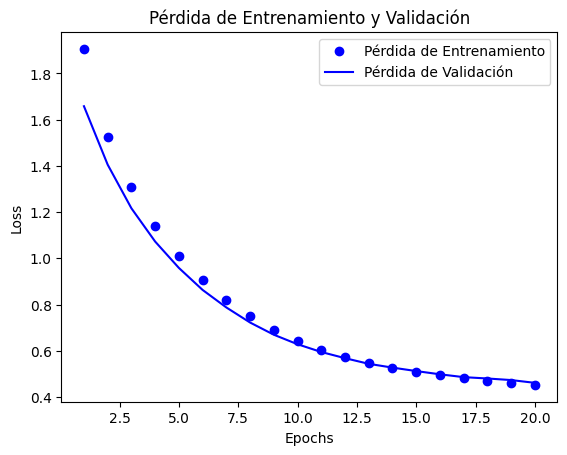

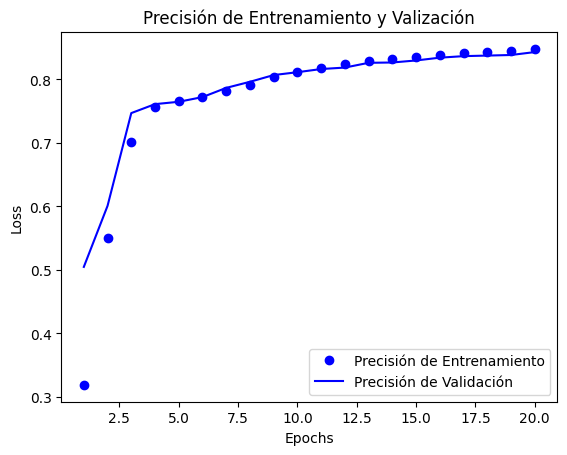

CASO  5
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[1.5767744779586792, 1.0148378610610962, 0.8537549376487732, 0.7728723287582397, 0.7215612530708313, 0.6849573254585266, 0.6564669609069824, 0.6339371800422668, 0.6152110695838928, 0.5994564294815063, 0.5857422947883606, 0.5739384889602661, 0.5637479424476624, 0.5542600750923157, 0.5461434721946716, 0.5384735465049744, 0.5315432548522949, 0.5253317356109619, 0.5197417140007019, 0.5142642855644226]
[0.5437999963760376, 0.7015799880027771, 0.7401800155639648, 0.7621399760246277, 0.7760800123214722, 0.7854999899864197, 0.7934799790382385, 0.7997000217437744, 0.8042799830436707, 0.8075399994850159, 0.8115000128746033, 0.814520001411438, 0.8168200254440308, 0.8192600011825562, 0.8213599920272827, 0.8236799836158752, 0.

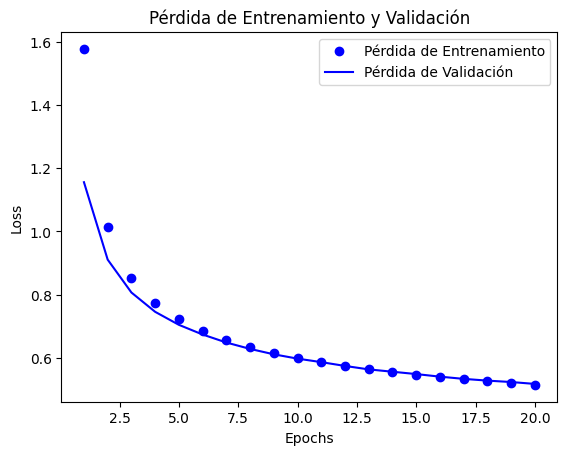

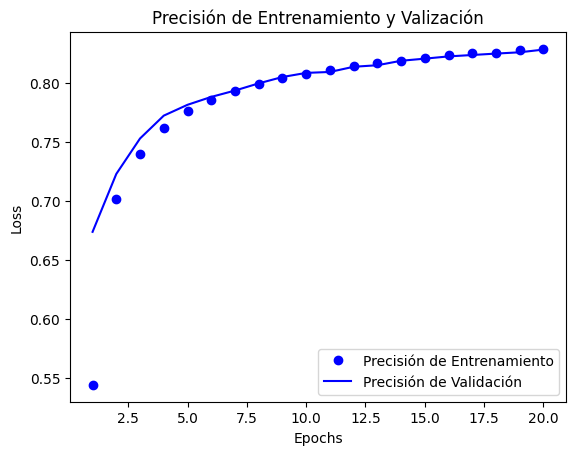

CASO  6
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[0.7701424956321716, 0.5146228671073914, 0.4466670751571655, 0.4049811065196991, 0.37290459871292114, 0.3524729609489441, 0.3341221213340759, 0.3203656077384949, 0.3092072308063507, 0.2950027585029602, 0.2856622338294983, 0.27631253004074097, 0.2689979076385498, 0.26039645075798035, 0.2536967098712921, 0.24604126811027527, 0.23945382237434387, 0.23144501447677612, 0.2279893159866333, 0.22250531613826752]
[0.7334399819374084, 0.8148999810218811, 0.8393800258636475, 0.8535000085830688, 0.8633599877357483, 0.8718000054359436, 0.8773800134658813, 0.882860004901886, 0.8869199752807617, 0.8896600008010864, 0.8938000202178955, 0.8978400230407715, 0.8995000123977661, 0.9040799736976624, 0.9066399931907654, 0.908819973

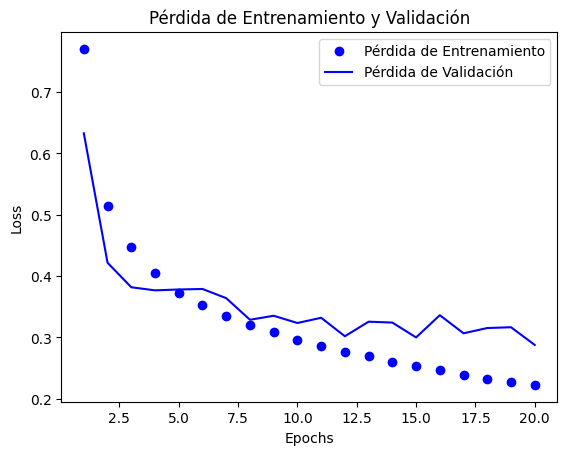

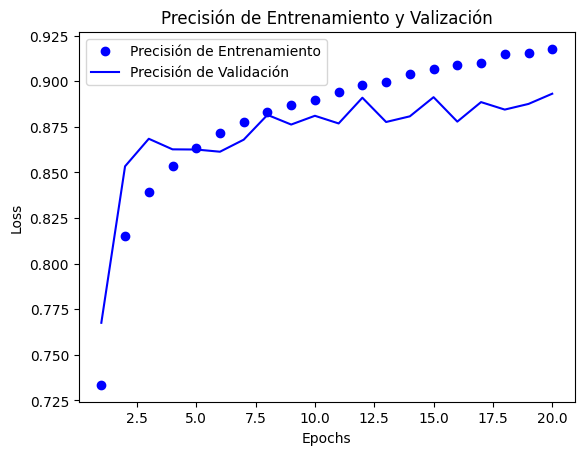

CASO  7
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[2.137660503387451, 1.8468230962753296, 1.6317106485366821, 1.4686797857284546, 1.3437087535858154, 1.246233344078064, 1.1688063144683838, 1.1058061122894287, 1.0540354251861572, 1.0104283094406128, 0.9735269546508789, 0.941630482673645, 0.9138530492782593, 0.889530599117279, 0.8680420517921448, 0.8489338159561157, 0.8316912651062012, 0.8161729574203491, 0.8021108508110046, 0.789208173751831]
[0.383760005235672, 0.6243600249290466, 0.6623200178146362, 0.6784800291061401, 0.6895400285720825, 0.6981599926948547, 0.7045400142669678, 0.710860013961792, 0.7157999873161316, 0.7198799848556519, 0.7232199907302856, 0.7261000275611877, 0.7297199964523315, 0.732699990272522, 0.7350199818611145, 0.7375800013542175, 0.7400

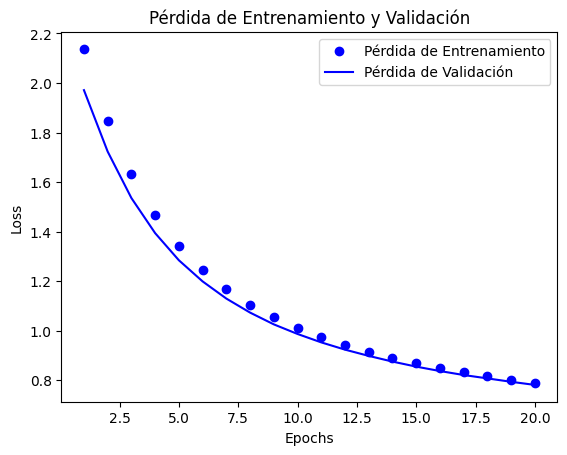

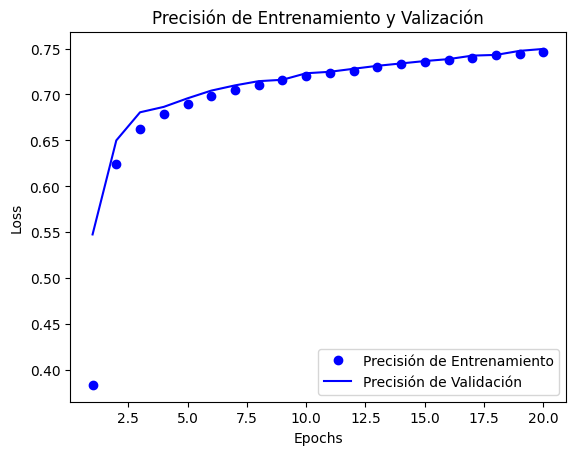

CASO  8
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[0.8636932969093323, 0.5610399842262268, 0.5093792080879211, 0.4740072190761566, 0.4560876190662384, 0.44253867864608765, 0.42494016885757446, 0.4185280203819275, 0.409041166305542, 0.40156570076942444, 0.3936043381690979, 0.3885956108570099, 0.3810202479362488, 0.37146157026290894, 0.3681815266609192, 0.3647339344024658, 0.3590218722820282, 0.35302242636680603, 0.3482828438282013, 0.34565791487693787]
[0.7208799719810486, 0.8010799884796143, 0.8178399801254272, 0.8313599824905396, 0.8355799913406372, 0.8392999768257141, 0.847100019454956, 0.8481799960136414, 0.8535000085830688, 0.8562399744987488, 0.8576599955558777, 0.8594800233840942, 0.8606600165367126, 0.8654999732971191, 0.8672000169754028, 0.86754000

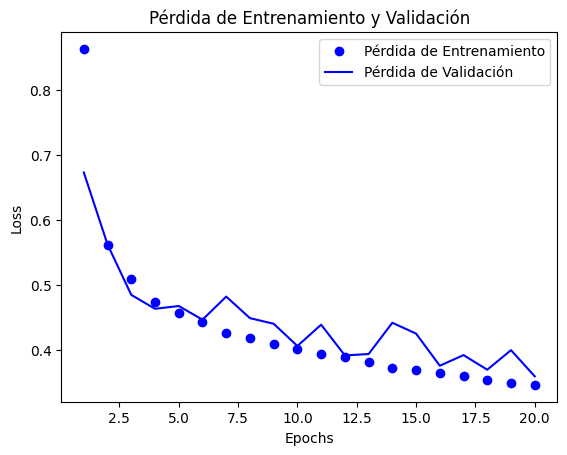

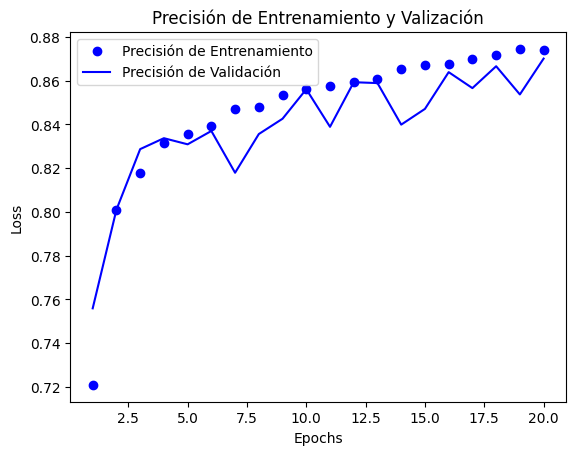

In [49]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  history_dict = historys[caso].history
  history_dict.keys()
  print(history_dict['loss'])
  print(history_dict['accuracy'])
  print(history_dict['val_loss'])
  print(history_dict['val_accuracy'])
  accuracy = historys[caso].history['accuracy']
  val_accuracy = historys[caso].history['val_accuracy']
  loss = historys[caso ].history['loss']
  val_loss = historys[caso].history['val_loss']
  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n\n")

  plt.clf()
  accuracy_values = history_dict['accuracy']
  val_accuracy_values = history_dict['val_accuracy']
  plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [50]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3870 - accuracy: 0.8620


In [51]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.647905170917511
PRECISIÓN CON LOS DATOS DE TEST:  0.7842000126838684



CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.45945489406585693
PRECISIÓN CON LOS DATOS DE TEST:  0.840499997138977



CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  1.370646595954895
PRECISIÓN CON LOS DATOS DE TEST:  0.6592000126838684



CASO  4
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4859409034252167
PRECISIÓN CON LOS DATOS DE TEST:  0.8328999876976013



CASO  5
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5361459255218506
PRECISIÓN CON LOS DATOS DE TEST:  0.8183000087738037



CASO  6
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.3197961449623108
PRECISIÓN CON LOS DATOS DE TEST:  0.8865000009536743



CASO  7
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.7943571209907532
PRECISIÓN CON L

cuestion 2

In [55]:
!pip install matplotlib-venn

In [56]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [59]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Imprimir la versión de TensorFlow
print(tf.__version__)


2.15.0


In [60]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [62]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [63]:
casos = 8
numero_neuronas_primera_capa = [10,10,10,10,512,512,512,512]
funcion_activacion_primera_capa = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optimizador =['sgd','rmsprop','sgd','rmsprop','sgd','rmsprop','sgd','rmsprop']
funcion_perdida = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
numero_iteraciones = [5,5,5,5,5,5,5,5]
metrica = ['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
models = []
historys = []

In [64]:
for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)

In [65]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

In [66]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
  print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8991 - accuracy: 0.6963
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5594 - accuracy: 0.8084
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5043 - accuracy: 0.8253
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4777 - accuracy: 0.8335
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4618 - accuracy: 0.8386



CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_cr

In [67]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8782


In [68]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4875321686267853
PRECISIÓN CON LOS DATOS DE TEST:  0.8267999887466431



CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4389576315879822
PRECISIÓN CON LOS DATOS DE TEST:  0.8471999764442444



CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.7561232447624207
PRECISIÓN CON LOS DATOS DE TEST:  0.7328000068664551



CASO  4
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4649621546268463
PRECISIÓN CON LOS DATOS DE TEST:  0.8353999853134155



CASO  5
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.443587064743042
PRECISIÓN CON LOS DATOS DE TEST:  0.8417999744415283



CASO  6
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.38506078720092773
PRECISIÓN CON LOS DATOS DE TEST:  0.8686000108718872



CASO  7
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5586562752723694
PRECISIÓN CON

In [69]:
# Look at confusion matrix
# Note, this code is taken straight from the SKLEARN website, an nice way of
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
313/313 [==============================] - 1s 2ms/step


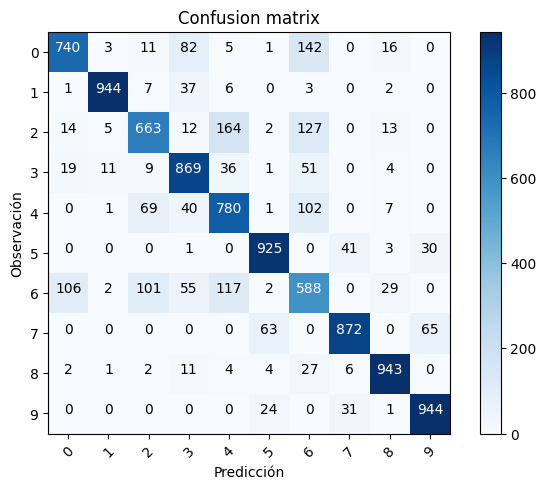




CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
313/313 [==============================] - 1s 2ms/step


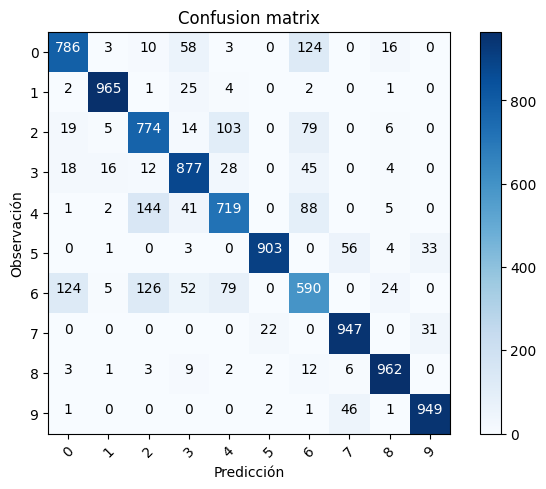




CASO  3
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
313/313 [==============================] - 1s 2ms/step


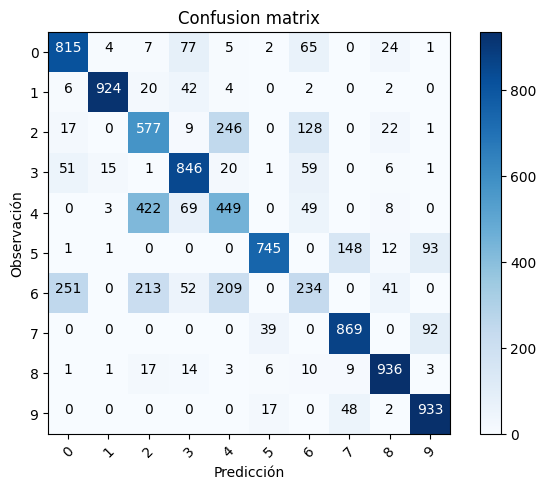




CASO  4
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
313/313 [==============================] - 1s 2ms/step


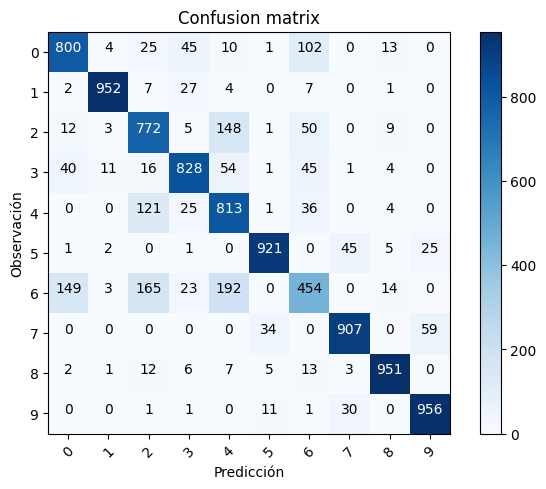




CASO  5
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
313/313 [==============================] - 1s 4ms/step


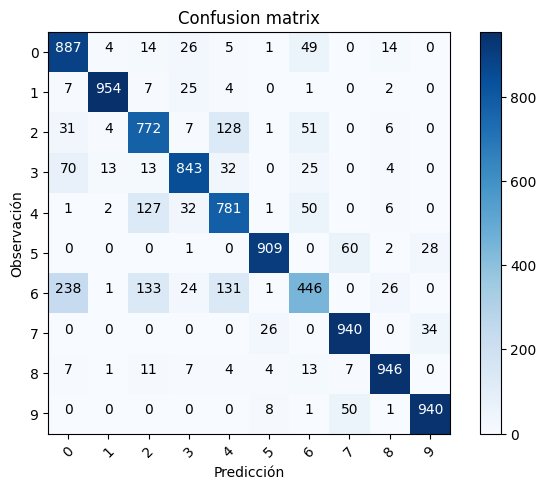




CASO  6
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
313/313 [==============================] - 1s 3ms/step


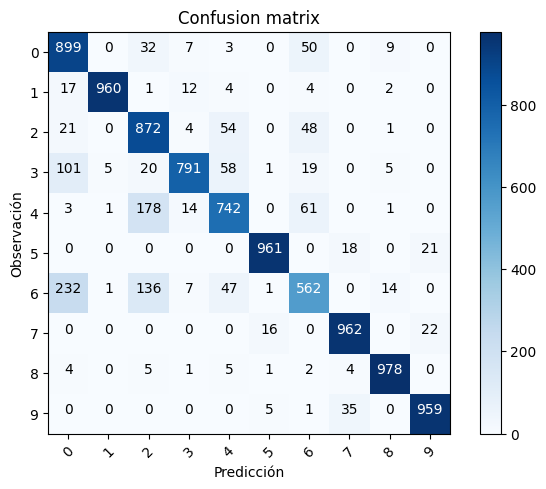




CASO  7
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
313/313 [==============================] - 1s 3ms/step


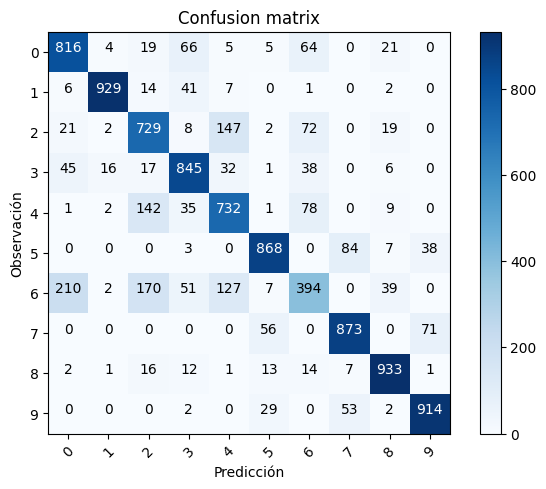




CASO  8
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
313/313 [==============================] - 1s 3ms/step


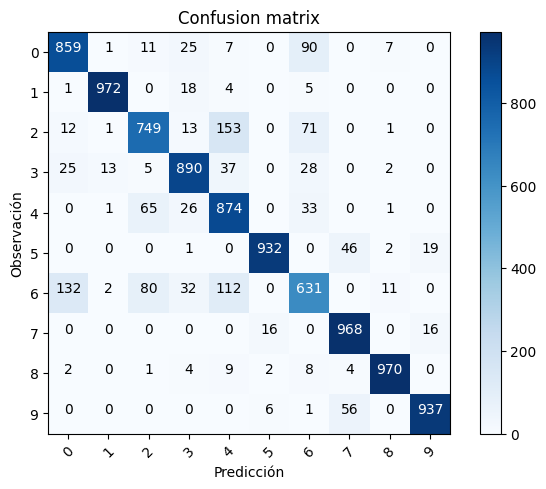

In [70]:
test_labelsp = to_categorical(test_labels)
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  # Predict the values from the validation dataset
  Y_pred = models[caso].predict(test_images)
  # Convert predictions classes to one hot vectors
  Y_pred_classes = np.argmax(Y_pred, axis = 1)
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(test_labelsp, axis = 1)
  # compute the confusion matrix
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
  # plot the confusion matrix
  plot_confusion_matrix(confusion_mtx, classes = range(10))
  plt.show()
  print("\n\n")